In [ ]:
# a. Read the provided CSV file ‘data.csv’.
# b. https://drive.google.com/drive/folders/1h8C3mLsso-R-sIOLsvoYwPLzy2fJ4IOF?usp=sharing
# c. Show the basic statistical description about the data.
# d. Check if the data has null values.
# i. Replace the null values with the mean
# e. Select at least two columns and aggregate the data using: min, max, count, mean.
# f. Filter the dataframe to select the rows with calories values between 500 and 1000.
# g. Filter the dataframe to select the rows with calories values > 500 and pulse < 100.
# h. Create a new “df_modified” dataframe that contains all the columns from df except for
# Maxpulse”.
# i. Delete the “Maxpulse” column from the main df dataframe
# j. Convert the datatype of Calories column to int datatype.
# k. Using pandas create a scatter plot for the two columns (Duration and Calories)

In [5]:
import pandas as pandas
import pandas as pd
df = pd.read_csv("/content/data.csv")
df.describe()


,Duration,Pulse,Maxpulse,Calories
count,169.000000,169.000000,169.000000,164.000000
mean,63.846154,107.461538,134.047337,375.790244
std,42.299949,14.510259,16.450434,266.379919
min,15.000000,80.000000,100.000000,50.300000
25%,45.000000,100.000000,124.000000,250.925000
50%,60.000000,105.000000,131.000000,318.600000
75%,60.000000,111.000000,141.000000,387.600000
max,300.000000,159.000000,184.000000,1860.400000


In [6]:
null_values = df.isnull().sum()
print(null_values)

Duration    0
Pulse       0
Maxpulse    0
Calories    5
dtype: int64


In [7]:
df.fillna(df.mean(), inplace=True)
print(df)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130     409.1
1          60    117       145     479.0
2          60    103       135     340.0
3          45    109       175     282.4
4          45    117       148     406.0
..        ...    ...       ...       ...
164        60    105       140     290.8
165        60    110       145     300.0
166        60    115       145     310.2
167        75    120       150     320.4
168        75    125       150     330.4

[169 rows x 4 columns]


In [8]:
df = df[["Duration", "Pulse" ]]

agg_dict = {"Duration": ["min", "max", "count", "mean"],
            "Pulse": ["min", "max", "count", "mean"]}
agg_df = df.agg(agg_dict)
print(agg_df)

         Duration       Pulse
min     15.000000   80.000000
max    300.000000  159.000000
count  169.000000  169.000000
mean    63.846154  107.461538


In [9]:
df = pd.read_csv("/content/data.csv")
Calories_filter = (df["Calories"] >= 500) & (df["Calories"] <= 1000)
filtered_df = df[Calories_filter]
print(filtered_df)

     Duration  Pulse  Maxpulse  Calories
51         80    123       146     643.1
62        160    109       135     853.0
65        180     90       130     800.4
66        150    105       135     873.4
67        150    107       130     816.0
72         90    100       127     700.0
73        150     97       127     953.2
75         90     98       125     563.2
78        120    100       130     500.4
83        120    100       130     500.0
90        180    101       127     600.1
99         90     93       124     604.1
101        90     90       110     500.0
102        90     90       100     500.0
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [10]:
df = pd.read_csv("/content/data.csv")
Calories_filter = (df["Calories"] > 500) & (df["Pulse"] < 100)
filtered_df = df[Calories_filter]
print(filtered_df)

     Duration  Pulse  Maxpulse  Calories
65        180     90       130     800.4
70        150     97       129    1115.0
73        150     97       127     953.2
75         90     98       125     563.2
99         90     93       124     604.1
103        90     90       100     500.4
106       180     90       120     800.3
108        90     90       120     500.3


In [11]:
df_modified = df.drop(columns=["Maxpulse"])
print(df_modified)

     Duration  Pulse  Calories
0          60    110     409.1
1          60    117     479.0
2          60    103     340.0
3          45    109     282.4
4          45    117     406.0
..        ...    ...       ...
164        60    105     290.8
165        60    110     300.0
166        60    115     310.2
167        75    120     320.4
168        75    125     330.4

[169 rows x 3 columns]


In [12]:
df['Calories'] = df['Calories'].fillna(0).astype(int)
print(df)

     Duration  Pulse  Maxpulse  Calories
0          60    110       130       409
1          60    117       145       479
2          60    103       135       340
3          45    109       175       282
4          45    117       148       406
..        ...    ...       ...       ...
164        60    105       140       290
165        60    110       145       300
166        60    115       145       310
167        75    120       150       320
168        75    125       150       330

[169 rows x 4 columns]


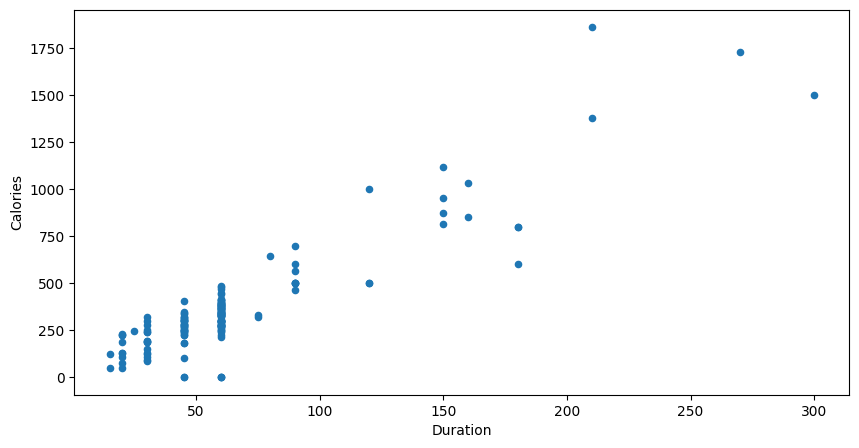

In [13]:
import matplotlib.pyplot as plt

df.plot(kind='scatter', x='Duration', y='Calories', figsize=(10,5))
plt.show()